In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set()

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
bowling_records = pd.read_csv('bowling_records.csv')

In [4]:
bowling_records.head()

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer
0,Shakib Al Hasan,BAN,2006-2022,96,95,354.3,3,2366,119,5/20,19.88,6.67,17.8,5,1
1,TG Southee,NZ,2008-2021,92,90,332.5,2,2729,111,5/18,24.58,8.19,17.9,1,1
2,Rashid Khan,AFG/ICC,2015-2022,61,61,231.2,1,1418,109,5/3,13.00,6.12,12.7,4,2
3,SL Malinga,SL,2006-2020,84,83,299.5,1,2225,107,5/6,20.79,7.42,16.8,1,2
4,Shahid Afridi,ICC/PAK,2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0


In [5]:
bowling_records.tail()

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer
1995,SJ Baard,NAM,2019-2022,25,-,-,-,-,-,-,-,-,-,-,-
1996,Babar Azam,PAK,2016-2022,74,-,-,-,-,-,-,-,-,-,-,-
1997,Babar Hayat,HKG,2014-2017,24,-,-,-,-,-,-,-,-,-,-,-
1998,S Badrinath,INDIA,2011-2011,1,-,-,-,-,-,-,-,-,-,-,-
1999,A Bagai,CAN,2008-2013,9,-,-,-,-,-,-,-,-,-,-,-


In [6]:
bowling_records.describe()

,matches
count,2000.000000
mean,12.965500
std,16.062045
min,1.000000
25%,3.000000
50%,7.000000
75%,16.000000
max,125.000000


In [7]:
bowling_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 2000 non-null   object
 1   country              1984 non-null   object
 2   span                 2000 non-null   object
 3   matches              2000 non-null   int64 
 4   innings              2000 non-null   object
 5   overs                2000 non-null   object
 6   madiens              2000 non-null   object
 7   runs                 2000 non-null   object
 8   wickets              2000 non-null   object
 9   best_bowling_figure  2000 non-null   object
 10  average              2000 non-null   object
 11  economy              2000 non-null   object
 12  strike_rate          2000 non-null   object
 13  4-fer                2000 non-null   object
 14  5-fer                2000 non-null   object
dtypes: int64(1), object(14)
memory usage: 234.5+ KB


In [8]:
bowling_records.duplicated().sum()

0

In [9]:
bowling_records.isnull().sum()

name                    0
country                16
span                    0
matches                 0
innings                 0
overs                   0
madiens                 0
runs                    0
wickets                 0
best_bowling_figure     0
average                 0
economy                 0
strike_rate             0
4-fer                   0
5-fer                   0
dtype: int64

In [10]:
bowling_records[bowling_records.country.isnull()]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer
700,M Magagula,NaN,2021-2021,6,6,20.0,0,138,7,3/12,19.71,6.90,17.1,0,0
815,Umair Qasim,NaN,2021-2021,6,6,18.0,0,133,6,3/41,22.16,7.38,18.0,0,0
853,J Ghadiyali,NaN,2021-2021,6,5,12.2,0,73,5,3/24,14.60,5.91,14.8,0,0
879,Muhammad Saleem,NaN,2019-2019,4,4,11.0,1,45,5,3/19,9.00,4.09,13.2,0,0
897,LH Rodrigues,NaN,2019-2019,4,4,13.0,1,61,5,3/15,12.20,4.69,15.6,0,0
924,Yasar Haroon,NaN,2019-2019,4,4,13.0,1,72,5,2/18,14.40,5.53,15.6,0,0
943,R Avery,NaN,2019-2019,4,4,11.0,0,66,4,2/13,16.50,6.00,16.5,0,0
1120,M Jele,NaN,2021-2021,4,4,8.0,0,63,3,2/27,21.00,7.87,16.0,0,0
1179,KM Silva,NaN,2019-2019,3,2,3.0,0,18,3,2/1,6.00,6.00,6.0,0,0
1240,JF Chester,NaN,2021-2021,4,2,5.0,0,51,2,2/33,25.50,10.20,15.0,0,0


In [11]:
bowling_records.dropna(axis=0,inplace=True)

In [12]:
bowling_records.average.unique()

array(['19.88', '24.58', '13.00', '20.79', '24.44', '19.65', '17.83',
       '16.97', '21.97', '22.71', '28.12', '26.10', '21.60', '27.92',
       '12.76', '21.79', '25.25', '21.22', '19.89', '23.18', '14.42',
       '22.95', '22.93', '24.01', '18.35', '16.50', '15.04', '23.14',
       '21.69', '14.14', '21.27', '22.75', '24.09', '23.15', '19.63',
       '16.88', '21.40', '22.03', '19.81', '22.24', '21.81', '16.87',
       '21.07', '20.78', '23.49', '22.16', '26.92', '18.42', '21.25',
       '15.05', '33.66', '26.00', '16.84', '30.27', '27.45', '22.52',
       '24.72', '22.29', '25.34', '24.31', '21.21', '20.28', '18.02',
       '17.17', '15.40', '19.04', '16.59', '22.77', '26.59', '25.36',
       '18.13', '24.30', '28.55', '26.16', '24.85', '36.35', '13.88',
       '28.57', '28.28', '22.33', '19.31', '14.75', '27.24', '21.43',
       '20.10', '24.50', '22.30', '21.15', '18.80', '25.84', '34.97',
       '17.33', '17.76', '18.94', '20.97', '31.57', '19.68', '24.23',
       '22.47', '26.

In [13]:
bowling_records.loc[bowling_records.average == '-']

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer
1613,Mohammad Aadil Alam,NEPAL,2022-2022,3,2,5.0,0,34,0,-,-,6.80,-,0,0
1614,Abdur Rauf,PAK,2008-2008,1,1,3.0,0,21,0,-,-,7.00,-,0,0
1615,M Aboagye,Ghana,2019-2019,3,1,1.0,0,17,0,-,-,17.00,-,0,0
1616,Adel Kolasangiani,Iran,2020-2020,1,1,1.0,0,16,0,-,-,16.00,-,0,0
1617,Adnan Razzaq,Belg,2021-2021,1,1,1.2,0,10,0,-,-,7.50,-,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,SJ Baard,NAM,2019-2022,25,-,-,-,-,-,-,-,-,-,-,-
1996,Babar Azam,PAK,2016-2022,74,-,-,-,-,-,-,-,-,-,-,-
1997,Babar Hayat,HKG,2014-2017,24,-,-,-,-,-,-,-,-,-,-,-
1998,S Badrinath,INDIA,2011-2011,1,-,-,-,-,-,-,-,-,-,-,-


In [14]:
bowling_records.drop(bowling_records[bowling_records.average == '-'].index, inplace=True)

In [15]:
bowling_records.shape

(1600, 15)

In [16]:
bowling_records.average = bowling_records.average.astype('float64')
bowling_records.innings = bowling_records.innings.astype('int64')
bowling_records.runs = bowling_records.runs.astype('int64')
bowling_records.wickets = bowling_records.wickets.astype('int64')
bowling_records.economy = bowling_records.economy.astype('float64')
bowling_records.overs = bowling_records.overs.astype('float64')
bowling_records.strike_rate = bowling_records.strike_rate.astype('float64')
bowling_records['4-fer'] = bowling_records['4-fer'].astype('int64')
bowling_records['5-fer'] = bowling_records['5-fer'].astype('int64')

In [17]:
bowling_records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 1612
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1600 non-null   object 
 1   country              1600 non-null   object 
 2   span                 1600 non-null   object 
 3   matches              1600 non-null   int64  
 4   innings              1600 non-null   int64  
 5   overs                1600 non-null   float64
 6   madiens              1600 non-null   object 
 7   runs                 1600 non-null   int64  
 8   wickets              1600 non-null   int64  
 9   best_bowling_figure  1600 non-null   object 
 10  average              1600 non-null   float64
 11  economy              1600 non-null   float64
 12  strike_rate          1600 non-null   float64
 13  4-fer                1600 non-null   int64  
 14  5-fer                1600 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory u

In [18]:
bowling_records.country.unique()

array(['BAN', 'NZ', 'AFG/ICC', 'SL', 'ICC/PAK', 'PAK', 'ENG', 'WI', 'IRE',
       'AFG', 'ICC/NEPAL', 'INDIA', 'AUS', 'SA', 'OMA', 'SA/World',
       'SCOT', 'UAE', 'NED', 'NEPAL', 'WI/World', 'ENG/IRE', 'NED/SA',
       'NAM', 'ICC/SL/World', 'KENYA', 'HKG', 'QAT', 'ENG/ITA', 'ZIM',
       'UGA', 'PNG', 'MLT', 'NAM/SA', 'JER', 'MAL', 'ICC/NZ', 'GER',
       'CAN', 'AUS/NED', 'MWI', '3', 'USA/WI', 'KUW', 'BUL', 'VAN', 'SGP',
       'ROM', 'BOT', 'LUX', 'NGA', 'SLE', 'Belg', 'GUE', 'SA/USA', 'Mald',
       'Arg', 'Aut', 'AFG/GER', 'CZK-R', 'Fin', '1', 'BMUDA', 'DEN',
       'ENG/World', 'RWN', 'USA', 'ESP', 'Saudi', 'BHR', 'GIBR', 'TAN',
       'Ghana', 'NZ/World', 'NOR', 'SUI', 'HUN', 'ITA', 'MOZ', 'EST',
       'GRC', 'SWE', 'ENG/ICC', 'Caym', 'Bhm', 'CYP', 'IOM', 'PORT',
       'THAI', 'Mex', 'PNM', 'Blz', 'Peru', 'Chile', 'DEN/ENG', 'LES',
       'CAM', 'Fran', 'SEY', 'PHI', 'Samoa', 'HKG/NZ', 'TKY', 'CRC',
       'SRB', 'AUS/World', 'BHU', '2', 'Iran'], dtype=object)

In [19]:
bowling_records.country.str.isnumeric().sum()

4

In [20]:
bowling_records[bowling_records['country'].isin (['1','2','3'])]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer
187,Mohammad Nawaz,3,2016-2021,30,30,97.0,1,694,25,2/11,27.76,7.15,23.2,0,0
316,Mohammad Wasim,1,2021-2022,11,11,33.2,0,270,17,4/40,15.88,8.10,11.7,1,0
1273,Imran Khan,1,2015-2015,3,3,12.0,0,106,2,2/35,53.00,8.83,36.0,0,0
1387,Aftab Ahmed,2,2019-2021,4,3,5.0,0,41,1,1/10,41.00,8.20,30.0,0,0


In [21]:
bowling_records.loc[bowling_records.country == '2','country'] = 'Den'
bowling_records.loc[bowling_records.country.str.isnumeric(),'country'] = 'Den'

In [22]:
bowling_records.country.str.isnumeric().sum()

0

In [23]:
bowling_records.nunique(axis=0)

name                   1596
country                 107
span                    152
matches                  90
innings                  75
overs                   481
madiens                   9
runs                    606
wickets                  80
best_bowling_figure     221
average                 864
economy                 549
strike_rate             283
4-fer                     6
5-fer                     3
dtype: int64

In [24]:
bowling_records.describe()

,matches,innings,overs,runs,wickets,average,economy,strike_rate,4-fer,5-fer
count,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000
mean,14.461250,11.28125,35.206812,260.380625,11.233750,28.394963,7.584419,22.05475,0.208125,0.048750
std,16.671149,13.13978,44.477084,328.348441,14.744278,18.615032,1.860799,12.29912,0.548860,0.237505
min,1.000000,1.00000,0.200000,1.000000,1.000000,1.000000,1.000000,2.00000,0.000000,0.000000
25%,4.000000,3.00000,9.000000,68.000000,3.000000,17.600000,6.477500,15.00000,0.000000,0.000000
50%,9.000000,7.00000,19.350000,140.500000,6.000000,23.860000,7.415000,19.30000,0.000000,0.000000
75%,18.000000,14.00000,41.175000,307.250000,14.000000,33.025000,8.500000,25.00000,0.000000,0.000000
max,125.000000,97.00000,361.200000,2729.000000,119.000000,190.000000,18.000000,136.00000,5.000000,2.000000


In [25]:
bowling_records.loc[bowling_records['name'].duplicated(keep = False)]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer
626,Junaid Khan,PAK,2011-2014,9,9,27.0,0,236,8,3/24,29.50,8.74,20.2,0,0
695,Junaid Khan,PORT,2021-2021,4,4,14.0,0,105,7,3/24,15.00,7.50,12.0,0,0
1210,Ziaur Rahman,BAN,2012-2014,14,7,12.3,0,127,3,1/16,42.33,10.16,25.0,0,0
1273,Imran Khan,Den,2015-2015,3,3,12.0,0,106,2,2/35,53.00,8.83,36.0,0,0
1274,Imran Khan,PORT,2019-2021,8,5,13.0,0,83,2,1/13,41.50,6.38,39.0,0,0
1342,Sandeep Goud,OMA,2019-2022,22,4,8.0,0,76,2,2/36,38.00,9.50,24.0,0,0
1381,Ziaur Rahman,AFG,2019-2019,1,1,4.0,0,42,2,2/42,21.00,10.50,12.0,0,0
1561,Sandeep Goud,Bhm,2021-2022,9,7,13.1,0,105,1,1/25,105.00,7.97,79.0,0,0


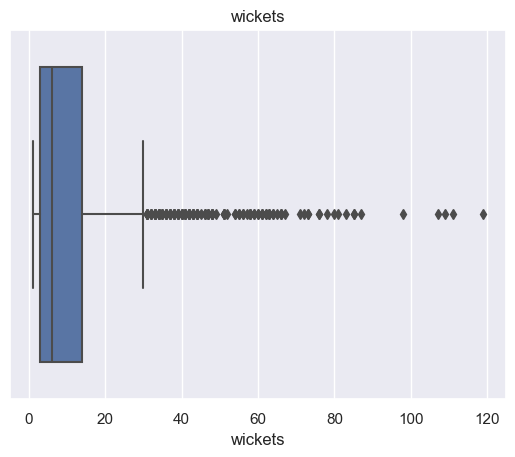

In [26]:
sns.boxplot(x='wickets',data=bowling_records)
plt.title("wickets")
plt.show()

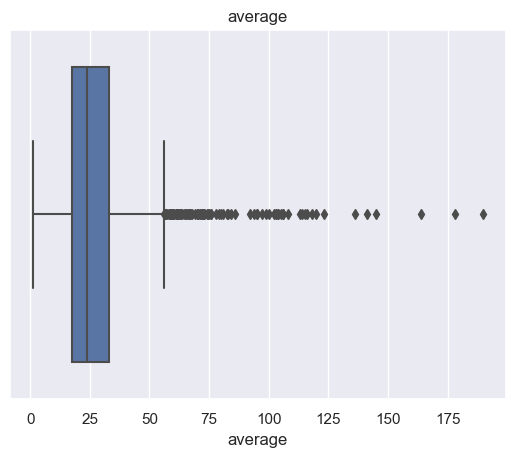

In [27]:
sns.boxplot(x='average',data = bowling_records)
plt.title("average")
plt.show()

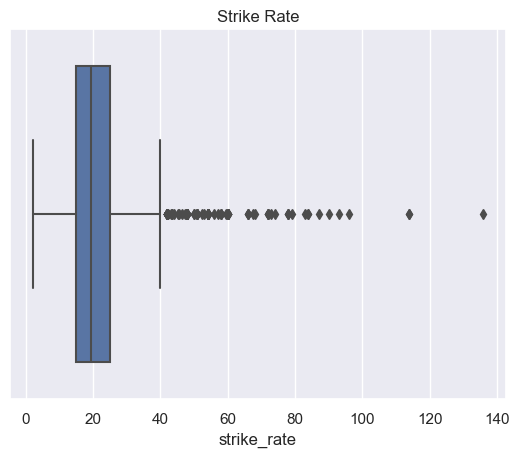

In [28]:
sns.boxplot(x='strike_rate',data = bowling_records)
plt.title("Strike Rate")
plt.show()

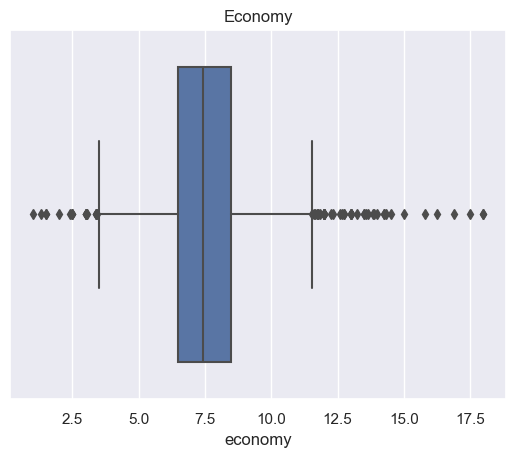

In [29]:
sns.boxplot(x='economy',data = bowling_records)
plt.title("Economy")
plt.show()

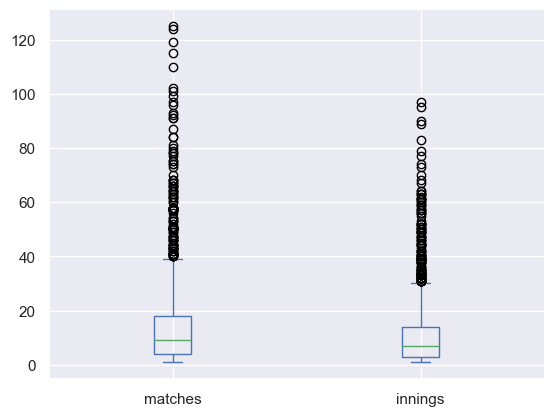

In [30]:
bowling_records[['matches','innings']].plot(kind='box')
plt.show()

In [31]:
bowling_records[bowling_records['country'].str.contains('/')]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer
2,Rashid Khan,AFG/ICC,2015-2022,61,61,231.2,1,1418,109,5/3,13.00,6.12,12.7,4,2
4,Shahid Afridi,ICC/PAK,2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0
14,S Lamichhane,ICC/NEPAL,2018-2022,39,39,146.5,3,932,73,4/20,12.76,6.34,12.0,2,0
26,Imran Tahir,SA/World,2013-2019,38,38,140.5,0,948,63,5/23,15.04,6.73,13.4,2,2
42,S Badree,WI/World,2012-2018,52,52,191.0,4,1180,56,4/15,21.07,6.17,20.4,1,0
45,WB Rankin,ENG/IRE,2009-2020,50,49,178.0,2,1219,55,3/16,22.16,6.84,19.4,0,0
47,RE van der Merwe,NED/SA,2009-2021,46,44,155.1,1,995,54,4/35,18.42,6.41,17.2,1,0
50,NLTC Perera,ICC/SL/World,2010-2021,84,67,183.4,1,1717,51,3/24,33.66,9.34,21.6,0,0
61,M Morkel,SA/World,2007-2017,44,44,158.4,3,1191,47,4/17,25.34,7.50,20.2,2,0
71,JW Dernbach,ENG/ITA,2011-2021,40,39,137.4,1,1170,44,4/22,26.59,8.49,18.7,1,0


In [32]:
bowling_records['country'] = bowling_records['country'].str.replace(r'/World','',regex=True)
bowling_records['country'] = bowling_records['country'].str.replace(r'/ICC','',regex=True)
bowling_records['country'] = bowling_records['country'].str.replace(r'ICC/','',regex=True)

In [33]:
bowling_records[bowling_records['country'].str.contains('/')]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer
45,WB Rankin,ENG/IRE,2009-2020,50,49,178.0,2,1219,55,3/16,22.16,6.84,19.4,0,0
47,RE van der Merwe,NED/SA,2009-2021,46,44,155.1,1,995,54,4/35,18.42,6.41,17.2,1,0
71,JW Dernbach,ENG/ITA,2011-2021,40,39,137.4,1,1170,44,4/22,26.59,8.49,18.7,1,0
102,D Wiese,NAM/SA,2013-2022,36,36,122.2,0,921,38,5/23,24.23,7.52,19.3,0,1
153,DP Nannes,AUS/NED,2009-2010,17,16,61.0,2,459,28,4/18,16.39,7.52,13.0,1,0
195,HR Walsh,USA/WI,2019-2022,31,25,78.5,0,619,25,3/23,24.76,7.85,18.9,0,0
265,J Theron,SA/USA,2010-2021,13,13,46.2,0,340,20,4/27,17.00,7.33,13.9,1,0
290,Izatullah Dawlatzai,AFG/GER,2012-2020,16,16,54.5,0,382,18,3/23,21.22,6.96,18.2,0,0
697,A Khan,DEN/ENG,2009-2022,9,9,22.5,1,150,7,2/25,21.42,6.56,19.5,0,0
952,MS Chapman,HKG/NZ,2014-2021,33,6,13.0,0,95,4,1/9,23.75,7.30,19.5,0,0


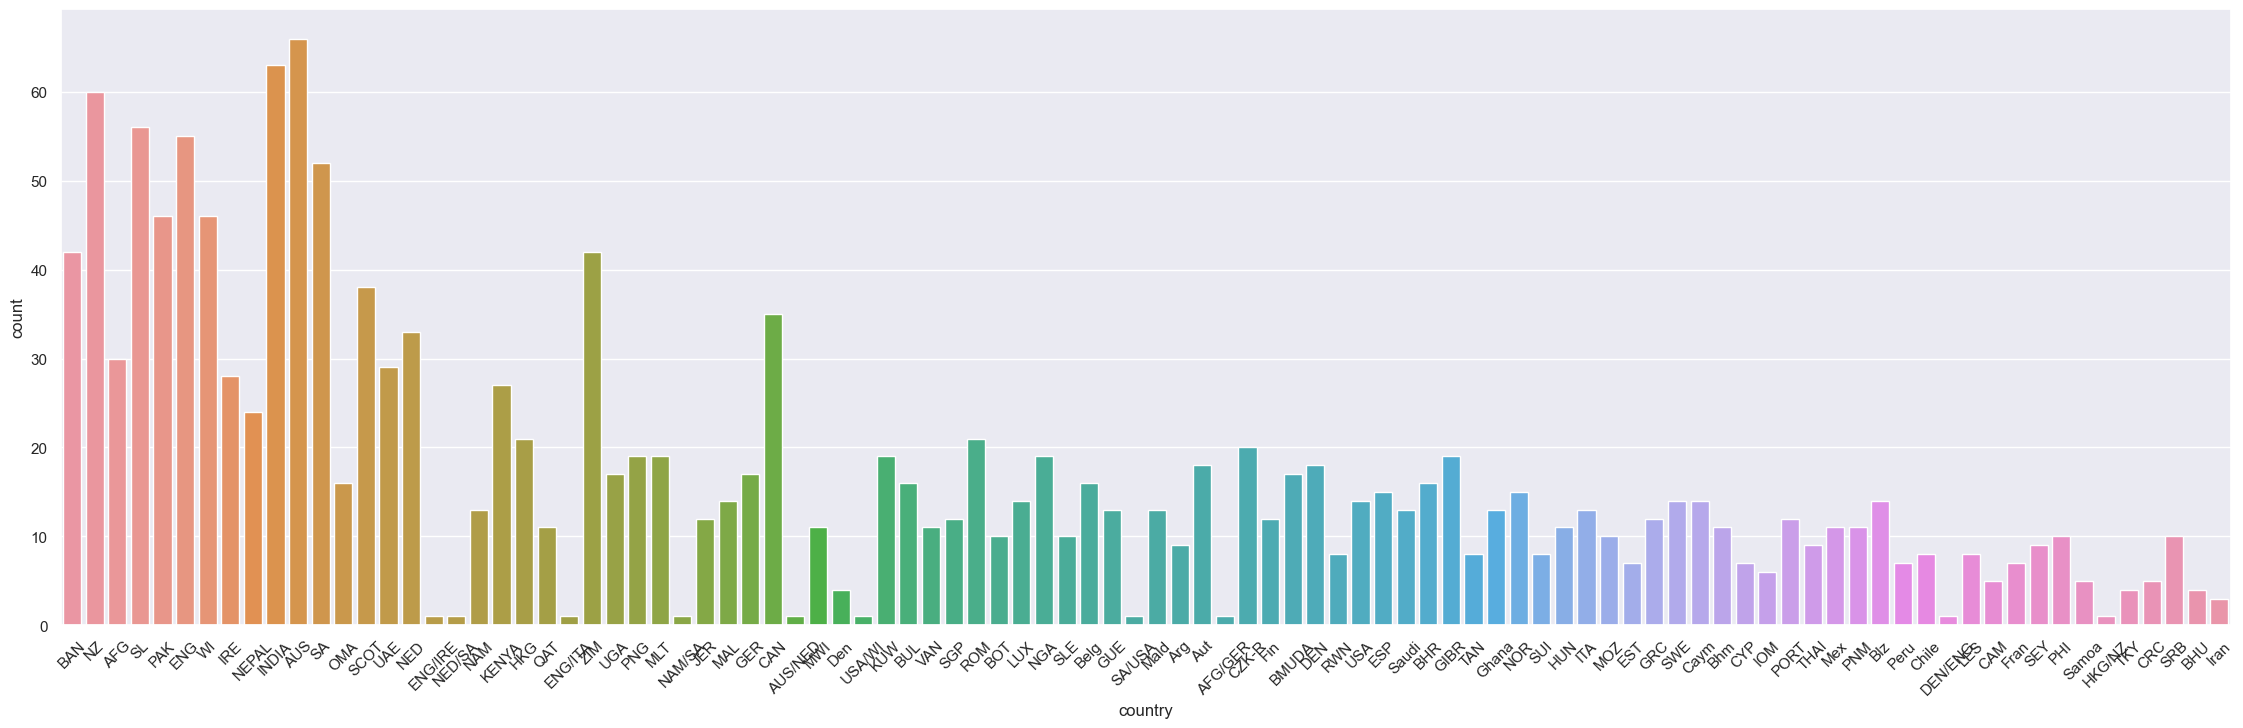

In [34]:
plt.figure(figsize=(28,8))
sns.countplot(x='country',data=bowling_records)
plt.xticks(rotation=45)
plt.show()

In [35]:
bowling_records_by_country = bowling_records.groupby('country').count()
countries_with_atleast_15_bowlers = bowling_records_by_country[bowling_records_by_country.name >15].index

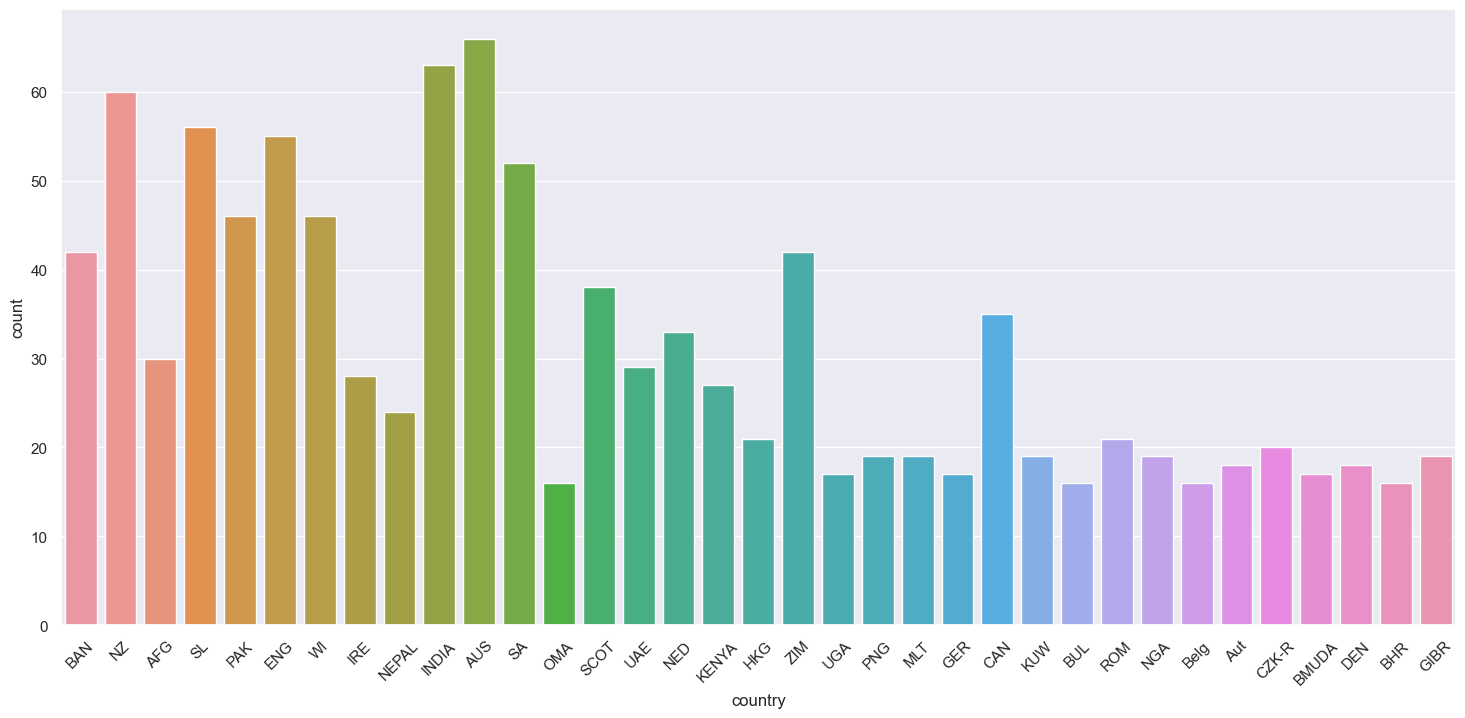

In [36]:
plt.figure(figsize=(18,8))
sns.countplot(x='country',data=bowling_records[bowling_records['country'].isin(countries_with_atleast_15_bowlers)])
plt.xticks(rotation=45)
plt.show()

In [37]:
top10countries = ['INDIA','ENG','PAK','SA','NZ','AUS','WI','SL','BAN','AFG']

In [38]:
bowling_records.shape

(1600, 15)

In [39]:
### Dropping Players who have played 4 innings or less  
bowling_records.drop(bowling_records[bowling_records.innings <= 3].index, inplace=True)

In [40]:
bowling_records.shape

(1167, 15)

In [41]:
bowling_records[bowling_records.country.isin(top10countries)].sort_values('economy',ascending = True)

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer
794,R Ravindra,NZ,2021-2021,6,5,19.0,0,83,6,3/22,13.83,4.36,19.0,0,0
494,AY Patel,NZ,2018-2021,7,7,26.0,0,118,11,4/16,10.72,4.53,14.1,1,0
557,Fazalhaq Farooqi,AFG,2021-2022,6,6,24.0,0,134,9,3/18,14.88,5.58,16.0,0,0
101,DL Vettori,NZ,2007-2014,34,34,131.1,1,748,38,4/20,19.68,5.70,20.7,1,0
845,JA Duffy,NZ,2020-2021,4,4,13.0,0,75,5,4/33,15.00,5.76,15.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,DC Drakes,WI,2021-2022,5,5,16.0,0,177,3,1/37,59.00,11.06,32.0,0,0
1141,SI Mahmood,ENG,2006-2009,4,4,14.0,0,155,3,1/31,51.66,11.07,28.0,0,0
724,OF Smith,WI,2018-2022,10,9,25.0,0,278,7,2/24,39.71,11.12,21.4,0,0
400,R Shepherd,WI,2020-2022,17,14,44.5,0,503,14,3/59,35.92,11.21,19.2,0,0


In [42]:
bowling_records.describe()

,matches,innings,overs,runs,wickets,average,economy,strike_rate,4-fer,5-fer
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,18.159383,14.686375,46.074722,339.808055,14.604970,29.109829,7.452408,22.888346,0.275064,0.065124
std,17.780353,13.915920,47.674978,352.540424,15.982647,18.948119,1.398698,12.544873,0.621723,0.273235
min,4.000000,4.000000,4.000000,31.000000,1.000000,6.550000,3.400000,6.600000,0.000000,0.000000
25%,7.000000,6.000000,16.450000,122.000000,5.000000,18.770000,6.515000,15.900000,0.000000,0.000000
50%,11.000000,9.000000,28.000000,204.000000,9.000000,24.230000,7.330000,19.800000,0.000000,0.000000
75%,22.000000,18.000000,55.000000,412.000000,18.000000,33.000000,8.245000,25.650000,0.000000,0.000000
max,125.000000,97.000000,361.200000,2729.000000,119.000000,190.000000,13.830000,136.000000,5.000000,2.000000


In [43]:
bowls_bolwed_per_innings = (bowling_records.overs * 6)/ bowling_records['innings']
bowling_records['balls_bolwed_per_innings'] = np.round(bowls_bolwed_per_innings,3)

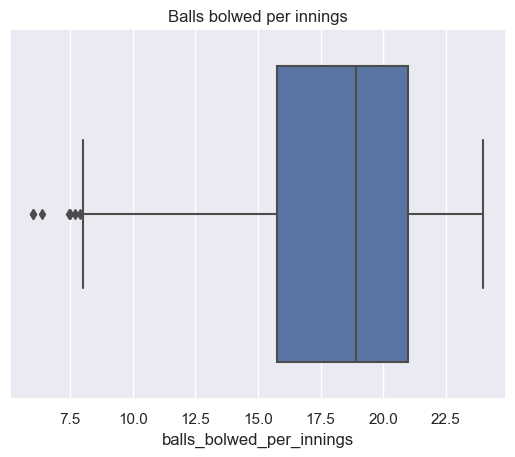

In [44]:
sns.boxplot(x='balls_bolwed_per_innings',data = bowling_records)
plt.title("Balls bolwed per innings")
plt.show()

In [45]:
bowling_records[bowling_records['balls_bolwed_per_innings'] == 24]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings
409,SR Clark,AUS,2006-2007,9,9,36.0,0,237,13,4/20,18.23,6.58,16.6,1,0,24.0
414,HV Mandhyan,HUN,2021-2022,13,12,48.0,0,366,13,3/30,28.15,7.62,22.1,0,0,24.0
553,A Dhingra,LUX,2021-2022,5,5,20.0,1,138,9,2/26,15.33,6.90,13.3,0,0,24.0
557,Fazalhaq Farooqi,AFG,2021-2022,6,6,24.0,0,134,9,3/18,14.88,5.58,16.0,0,0,24.0
558,MGSM Fernando,ITA,2021-2021,6,6,24.0,0,121,9,2/15,13.44,5.04,16.0,0,0,24.0
574,A Neill,SCOT,2019-2019,5,5,20.0,0,154,9,3/21,17.11,7.70,13.3,0,0,24.0
581,C Rumistrzewicz,ESP,2021-2022,6,6,24.0,3,84,9,3/15,9.33,3.50,16.0,0,0,24.0
587,Sirajullah Khadim,PORT,2021-2021,4,4,16.0,0,76,9,3/16,8.44,4.75,10.6,0,0,24.0
593,I Wardlaw,SCOT,2013-2013,4,4,16.0,1,145,9,3/40,16.11,9.06,10.6,0,0,24.0
602,M Akayezu,RWN,2021-2021,11,7,28.0,1,185,8,4/9,23.12,6.60,21.0,1,0,24.0


In [46]:
bowling_records[bowling_records['balls_bolwed_per_innings'] < 7.5]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings
925,C Zavoiu,ROM,2019-2022,16,5,5.3,0,44,5,3/4,8.8,8.00,6.6,0,0,6.360
976,Hussain Talat,PAK,2018-2021,18,6,6.0,0,54,4,2/12,13.5,9.00,9.0,0,0,6.000
1451,NA Greenwood,JER,2019-2022,11,4,4.0,0,31,1,1/4,31.0,7.75,24.0,0,0,6.000
1572,RG Sharma,INDIA,2007-2022,125,9,11.2,0,113,1,1/22,113.0,9.97,68.0,0,0,7.467


In [47]:
bowling_records['wicket_index'] = np.round(bowling_records.wickets / bowling_records.innings,3) 

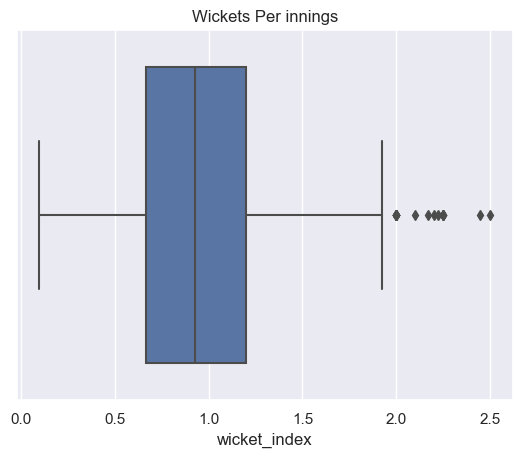

In [48]:
sns.boxplot(x='wicket_index',data = bowling_records)
plt.title("Wickets Per innings")
plt.show()

In [49]:
bowling_records.loc[bowling_records['wicket_index']>2.0]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings,wicket_index
226,D Maisuria,BOT,2019-2021,10,9,33.0,1,172,22,4/13,7.81,5.21,9.0,2,0,22.000,2.444
232,AC Botha,IRE,2008-2010,14,10,34.0,0,184,21,3/14,8.76,5.41,9.7,0,0,20.400,2.100
249,S Conteh,SLE,2021-2021,10,9,32.0,0,167,20,5/17,8.35,5.21,9.6,1,1,21.333,2.222
406,Ashwin Vinod,SUI,2021-2022,6,6,23.0,0,142,13,3/18,10.92,6.17,10.6,0,0,23.000,2.167
477,Hassan Mehmood,SWE,2021-2021,5,5,16.0,1,115,11,5/14,10.45,7.18,8.7,0,1,19.200,2.200
539,Waqar Ali,CYP,2021-2021,4,4,14.5,0,67,10,4/14,6.70,4.51,8.9,1,0,21.750,2.500
551,LA Burns,ESP,2022-2022,4,4,13.0,0,59,9,5/11,6.55,4.53,8.6,0,1,19.500,2.250
587,Sirajullah Khadim,PORT,2021-2021,4,4,16.0,0,76,9,3/16,8.44,4.75,10.6,0,0,24.000,2.250
593,I Wardlaw,SCOT,2013-2013,4,4,16.0,1,145,9,3/40,16.11,9.06,10.6,0,0,24.000,2.250
597,Zaker Taqawi,SWE,2022-2022,4,4,13.4,1,89,9,5/25,9.88,6.51,9.1,0,1,20.100,2.250


In [50]:
big_impact = bowling_records['4-fer'] + bowling_records ['5-fer']

bowling_records['big_impact_index'] = np.round( big_impact/bowling_records.innings, 3)

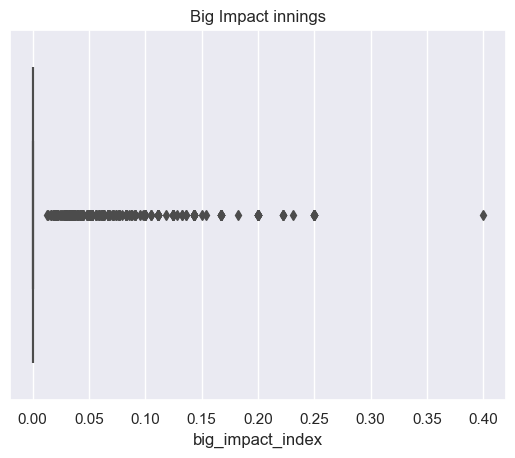

In [51]:
sns.boxplot(x='big_impact_index',data = bowling_records)
plt.title("Big Impact innings")
plt.show()

In [52]:
bowling_records[(bowling_records['4-fer'] > 0) | (bowling_records['5-fer'] > 0)]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings,wicket_index,big_impact_index
0,Shakib Al Hasan,BAN,2006-2022,96,95,354.3,3,2366,119,5/20,19.88,6.67,17.8,5,1,22.377,1.253,0.063
1,TG Southee,NZ,2008-2021,92,90,332.5,2,2729,111,5/18,24.58,8.19,17.9,1,1,22.167,1.233,0.022
2,Rashid Khan,AFG,2015-2022,61,61,231.2,1,1418,109,5/3,13.00,6.12,12.7,4,2,22.741,1.787,0.098
3,SL Malinga,SL,2006-2020,84,83,299.5,1,2225,107,5/6,20.79,7.42,16.8,1,2,21.651,1.289,0.036
4,Shahid Afridi,PAK,2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0,22.342,1.010,0.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,LMP Simmons,WI,2007-2021,68,5,7.1,0,72,6,4/19,12.00,10.04,7.1,1,0,8.520,1.200,0.200
845,JA Duffy,NZ,2020-2021,4,4,13.0,0,75,5,4/33,15.00,5.76,15.6,1,0,19.500,1.250,0.250
867,M Kpaka,SLE,2021-2021,7,7,16.5,0,95,5,4/11,19.00,5.64,20.2,1,0,14.143,0.714,0.143
888,SJ Patel,CZK-R,2021-2022,7,5,12.0,0,92,5,4/34,18.40,7.66,14.4,1,0,14.400,1.000,0.200


In [53]:
bowling_records[(bowling_records['big_impact_index'] > 0) & bowling_records.country.isin(top10countries)]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings,wicket_index,big_impact_index
0,Shakib Al Hasan,BAN,2006-2022,96,95,354.3,3,2366,119,5/20,19.88,6.67,17.8,5,1,22.377,1.253,0.063
1,TG Southee,NZ,2008-2021,92,90,332.5,2,2729,111,5/18,24.58,8.19,17.9,1,1,22.167,1.233,0.022
2,Rashid Khan,AFG,2015-2022,61,61,231.2,1,1418,109,5/3,13.00,6.12,12.7,4,2,22.741,1.787,0.098
3,SL Malinga,SL,2006-2020,84,83,299.5,1,2225,107,5/6,20.79,7.42,16.8,1,2,21.651,1.289,0.036
4,Shahid Afridi,PAK,2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0,22.342,1.010,0.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,JL Denly,ENG,2009-2020,13,6,12.0,0,93,7,4/19,13.28,7.75,10.2,1,0,12.000,1.167,0.167
792,MW Parkinson,ENG,2019-2021,4,4,14.0,0,133,6,4/47,22.16,9.50,14.0,1,0,21.000,1.500,0.250
808,LMP Simmons,WI,2007-2021,68,5,7.1,0,72,6,4/19,12.00,10.04,7.1,1,0,8.520,1.200,0.200
845,JA Duffy,NZ,2020-2021,4,4,13.0,0,75,5,4/33,15.00,5.76,15.6,1,0,19.500,1.250,0.250


In [54]:
bowling_records.loc[bowling_records['best_bowling_figure'].astype(str).str.contains('6/')]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings,wicket_index,big_impact_index
16,YS Chahal,INDIA,2016-2022,57,57,220.4,1,1818,72,6/25,25.25,8.23,18.3,2,1,23.200,1.263,0.053
20,BAW Mendis,SL,2008-2014,39,39,147.3,5,952,66,6/8,14.42,6.45,13.4,3,2,22.662,1.692,0.128
49,JN Frylinck,NAM,2019-2022,35,34,116.0,0,768,51,6/24,15.05,6.62,13.6,1,1,20.471,1.500,0.059
60,AC Agar,AUS,2016-2022,46,46,161.4,1,1048,47,6/30,22.29,6.48,20.6,0,2,21.052,1.022,0.043
80,DM Nakrani,UGA,2019-2022,29,28,97.4,3,583,42,6/7,13.88,5.96,13.9,0,2,20.871,1.500,0.071
140,JJ Smit,NAM,2019-2022,29,24,85.0,1,576,31,6/10,18.58,6.77,16.4,0,1,21.250,1.292,0.042
169,DL Chahar,INDIA,2018-2022,20,20,70.0,1,579,26,6/7,22.26,8.27,16.1,0,1,21.000,1.300,0.050
246,P Aho,NGA,2021-2021,16,16,52.5,3,337,20,6/5,16.85,6.37,15.8,0,1,19.688,1.250,0.062
272,H Fennell,Arg,2019-2021,11,11,30.5,1,196,19,6/18,10.31,6.35,9.7,1,1,16.636,1.727,0.182


In [55]:
bowling_records['wickets_without_4-fer/5-fer'] = bowling_records.wickets - (4*bowling_records['4-fer'] + 5*bowling_records['5-fer'])

bowling_records.loc[bowling_records['best_bowling_figure'].astype(str).str.contains('6/'), 'wickets_without_4-fer/5-fer'] = bowling_records['wickets_without_4-fer/5-fer'] -1
bowling_records.loc[bowling_records.name == 'BAW Mendis', 'wickets_without_4-fer/5-fer'] = bowling_records['wickets_without_4-fer/5-fer'] -1

bowling_records['short_impact_index'] = np.round(bowling_records['wickets_without_4-fer/5-fer'] / (bowling_records['innings'] - bowling_records['4-fer'] - bowling_records['5-fer']),3)                         

In [56]:
bowling_records

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings,wicket_index,big_impact_index,wickets_without_4-fer/5-fer,short_impact_index
0,Shakib Al Hasan,BAN,2006-2022,96,95,354.3,3,2366,119,5/20,19.88,6.67,17.8,5,1,22.377,1.253,0.063,94,1.056
1,TG Southee,NZ,2008-2021,92,90,332.5,2,2729,111,5/18,24.58,8.19,17.9,1,1,22.167,1.233,0.022,102,1.159
2,Rashid Khan,AFG,2015-2022,61,61,231.2,1,1418,109,5/3,13.00,6.12,12.7,4,2,22.741,1.787,0.098,83,1.509
3,SL Malinga,SL,2006-2020,84,83,299.5,1,2225,107,5/6,20.79,7.42,16.8,1,2,21.651,1.289,0.036,93,1.162
4,Shahid Afridi,PAK,2006-2018,99,97,361.2,4,2396,98,4/11,24.44,6.63,22.1,3,0,22.342,1.010,0.031,86,0.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,S Thanikaithasan,DEN,2021-2021,6,4,8.5,0,66,1,1/29,66.00,7.47,53.0,0,0,12.750,0.250,0.000,1,0.250
1596,JJ Tucker,BMUDA,2019-2019,5,4,7.0,0,62,1,1/16,62.00,8.85,42.0,0,0,10.500,0.250,0.000,1,0.250
1602,CL White,AUS,2007-2014,47,5,7.0,0,51,1,1/11,51.00,7.28,42.0,0,0,8.400,0.200,0.000,1,0.200
1608,Zahid Khan,SLE,2021-2021,4,4,10.0,0,75,1,1/10,75.00,7.50,60.0,0,0,15.000,0.250,0.000,1,0.250


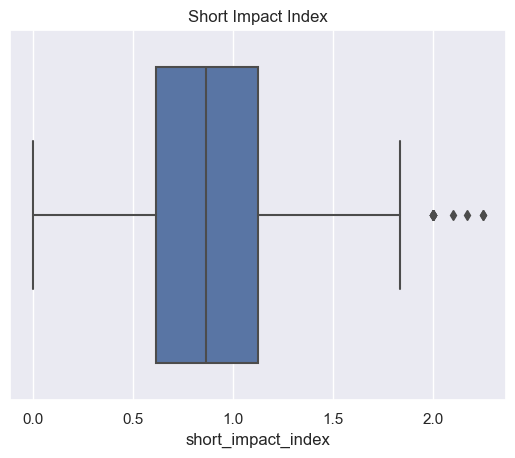

In [57]:
sns.boxplot(x='short_impact_index',data = bowling_records)
plt.title("Short Impact Index")
plt.show()

In [58]:
bowling_records.loc[bowling_records.short_impact_index > 1.6]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings,wicket_index,big_impact_index,wickets_without_4-fer/5-fer,short_impact_index
14,S Lamichhane,NEPAL,2018-2022,39,39,146.5,3,932,73,4/20,12.76,6.34,12.0,2,0,22.538,1.872,0.051,65,1.757
226,D Maisuria,BOT,2019-2021,10,9,33.0,1,172,22,4/13,7.81,5.21,9.0,2,0,22.000,2.444,0.222,14,2.000
232,AC Botha,IRE,2008-2010,14,10,34.0,0,184,21,3/14,8.76,5.41,9.7,0,0,20.400,2.100,0.000,21,2.100
239,Mohammad Sami,PAK,2010-2016,13,13,46.0,0,387,21,3/16,18.42,8.41,13.1,0,0,21.231,1.615,0.000,21,1.615
308,AB Dinda,INDIA,2009-2012,9,9,30.0,1,245,17,4/19,14.41,8.16,10.5,1,0,20.000,1.889,0.111,13,1.625
312,CK Langeveldt,SA,2005-2010,9,9,33.0,0,241,17,4/19,14.17,7.30,11.6,1,0,22.000,1.889,0.111,13,1.625
347,Aftab Hussain,HKG,2020-2020,9,9,34.0,1,225,15,3/14,15.00,6.61,13.6,0,0,22.667,1.667,0.000,15,1.667
369,Sami Ullah,ROM,2020-2021,9,9,28.0,1,195,15,3/10,13.00,6.96,11.2,0,0,18.667,1.667,0.000,15,1.667
378,Bilal Zalmai,Aut,2019-2021,8,7,26.0,1,137,14,4/12,9.78,5.26,11.1,1,0,22.286,2.000,0.143,10,1.667
397,Salman Nazar,CAN,2021-2022,7,7,26.0,0,152,14,3/8,10.85,5.84,11.1,0,0,22.286,2.000,0.000,14,2.000


In [59]:
bowling_records['runs_index'] = np.round(bowling_records.runs / bowling_records.innings , 3)

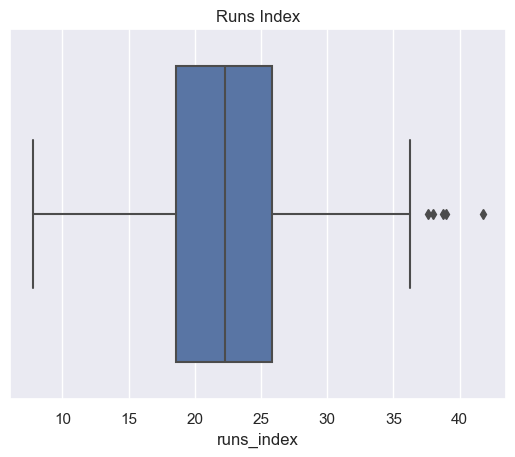

In [60]:
sns.boxplot(x='runs_index',data = bowling_records)
plt.title("Runs Index")
plt.show()

In [61]:
bowling_records.loc[bowling_records.runs_index > 35]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings,wicket_index,big_impact_index,wickets_without_4-fer/5-fer,short_impact_index,runs_index
400,R Shepherd,WI,2020-2022,17,14,44.5,0,503,14,3/59,35.92,11.21,19.2,0,0,19.071,1.000,0.0,14,1.000,35.929
530,CAK Rajitha,SL,2016-2019,10,10,37.0,0,358,10,3/29,35.80,9.67,22.2,0,0,22.200,1.000,0.0,10,1.000,35.800
593,I Wardlaw,SCOT,2013-2013,4,4,16.0,1,145,9,3/40,16.11,9.06,10.6,0,0,24.000,2.250,0.0,9,2.250,36.250
635,RP Meredith,AUS,2021-2021,5,5,18.5,0,188,8,3/48,23.50,9.98,14.1,0,0,22.200,1.600,0.0,8,1.600,37.600
679,M de Lange,SA,2012-2015,6,6,23.2,0,228,7,2/26,32.57,9.77,20.0,0,0,23.200,1.167,0.0,7,1.167,38.000
702,S Mahmood,ENG,2019-2022,12,11,38.0,0,398,7,3/33,56.85,10.47,32.5,0,0,20.727,0.636,0.0,7,0.636,36.182
735,BM Wheeler,NZ,2017-2018,6,6,21.2,0,216,7,2/16,30.85,10.12,18.2,0,0,21.200,1.167,0.0,7,1.167,36.000
781,Muhammad Ansar,KUW,2020-2020,4,4,13.5,0,143,6,3/27,23.83,10.33,13.8,0,0,20.250,1.500,0.0,6,1.500,35.750
875,Mohammed Siraj,INDIA,2017-2022,5,5,20.0,0,209,5,1/22,41.80,10.45,24.0,0,0,24.000,1.000,0.0,5,1.000,41.800
962,RR Emrit,WI,2018-2018,4,4,16.0,0,156,4,1/24,39.00,9.75,24.0,0,0,24.000,1.000,0.0,4,1.000,39.000


In [62]:
bowling_records.loc[bowling_records.runs_index < 10]

,name,country,span,matches,innings,overs,madiens,runs,wickets,best_bowling_figure,average,economy,strike_rate,4-fer,5-fer,balls_bolwed_per_innings,wicket_index,big_impact_index,wickets_without_4-fer/5-fer,short_impact_index,runs_index
799,Sabbir Rahman,BAN,2014-2019,44,8,11.1,0,70,6,3/11,11.66,6.26,11.1,0,0,8.325,0.750,0.0,6,0.750,8.750
925,C Zavoiu,ROM,2019-2022,16,5,5.3,0,44,5,3/4,8.80,8.00,6.6,0,0,6.360,1.000,0.0,5,1.000,8.800
949,S Bau,PNG,2016-2022,33,14,20.0,0,132,4,2/4,33.00,6.60,30.0,0,0,8.571,0.286,0.0,4,0.286,9.429
961,NS Dhaliwal,CAN,2019-2022,23,6,10.0,0,59,4,1/11,14.75,5.90,15.0,0,0,10.000,0.667,0.0,4,0.667,9.833
976,Hussain Talat,PAK,2018-2021,18,6,6.0,0,54,4,2/12,13.50,9.00,9.0,0,0,6.000,0.667,0.0,4,0.667,9.000
1065,Aaron Jones,USA,2019-2021,14,6,12.0,0,55,3,1/6,18.33,4.58,24.0,0,0,12.000,0.500,0.0,3,0.500,9.167
1451,NA Greenwood,JER,2019-2022,11,4,4.0,0,31,1,1/4,31.00,7.75,24.0,0,0,6.000,0.250,0.0,1,0.250,7.750


In [63]:
bowler = bowling_records[['name','country','average','strike_rate','economy','balls_bolwed_per_innings','wicket_index','big_impact_index','short_impact_index','runs_index']]
bowler

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,Shakib Al Hasan,BAN,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905
1,TG Southee,NZ,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322
2,Rashid Khan,AFG,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246
3,SL Malinga,SL,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807
4,Shahid Afridi,PAK,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701
...,...,...,...,...,...,...,...,...,...,...
1593,S Thanikaithasan,DEN,66.00,53.0,7.47,12.750,0.250,0.000,0.250,16.500
1596,JJ Tucker,BMUDA,62.00,42.0,8.85,10.500,0.250,0.000,0.250,15.500
1602,CL White,AUS,51.00,42.0,7.28,8.400,0.200,0.000,0.200,10.200
1608,Zahid Khan,SLE,75.00,60.0,7.50,15.000,0.250,0.000,0.250,18.750


In [64]:
bowler.describe()

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,29.109829,22.888346,7.452408,18.138744,0.952300,0.020539,0.886069,22.346381
std,18.948119,12.544873,1.398698,3.667453,0.408976,0.047605,0.366431,5.373272
min,6.550000,6.600000,3.400000,6.000000,0.100000,0.000000,0.000000,7.750000
25%,18.770000,15.900000,6.515000,15.775000,0.667000,0.000000,0.615000,18.563500
50%,24.230000,19.800000,7.330000,18.923000,0.929000,0.000000,0.864000,22.250000
75%,33.000000,25.650000,8.245000,21.000000,1.200000,0.000000,1.125000,25.798000
max,190.000000,136.000000,13.830000,24.000000,2.500000,0.400000,2.250000,41.800000


In [65]:
bowler.loc[bowling_records['short_impact_index'].isnull()  , 'short_impact_index'] = 0

In [66]:
bowler.isnull().sum()

name                        0
country                     0
average                     0
strike_rate                 0
economy                     0
balls_bolwed_per_innings    0
wicket_index                0
big_impact_index            0
short_impact_index          0
runs_index                  0
dtype: int64

In [67]:
bowling_records['prelim_metric'] = np.round((bowling_records['average'] * bowling_records['economy'])/6 , 3)

In [68]:
bowling_records.loc[((bowling_records['prelim_metric'] < 30) & (bowling_records.wickets >= 25)), 'pre-rank'] = 'Best'
bowling_records.loc[((bowling_records['prelim_metric'] < 30) & (bowling_records.wickets < 25)), 'pre-rank'] = 'Good'
bowling_records.loc[((bowling_records['prelim_metric'] < 40) & (bowling_records['prelim_metric'] >30)), 'pre-rank'] = 'Good'
bowling_records.loc[((bowling_records['prelim_metric'] <65 ) & (bowling_records['prelim_metric'] >40)), 'pre-rank'] = 'Average'
bowling_records.loc[((bowling_records['prelim_metric'] > 65)), 'pre-rank'] = 'Poor'
bowling_records.loc[(bowling_records.wickets < 5), 'pre-rank'] = 'Poor'



In [69]:
bowling_records['pre-rank'].value_counts()  

pre-rank
Good       611
Poor       298
Average    135
Best       123
Name: count, dtype: int64

In [70]:
bowler['prelim_metric'] = bowling_records['prelim_metric']
bowler['pre-rank'] = bowling_records['pre-rank']

In [71]:
bowler

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank
0,Shakib Al Hasan,BAN,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905,22.100,Best
1,TG Southee,NZ,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322,33.552,Good
2,Rashid Khan,AFG,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246,13.260,Best
3,SL Malinga,SL,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807,25.710,Best
4,Shahid Afridi,PAK,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701,27.006,Best
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,S Thanikaithasan,DEN,66.00,53.0,7.47,12.750,0.250,0.000,0.250,16.500,82.170,Poor
1596,JJ Tucker,BMUDA,62.00,42.0,8.85,10.500,0.250,0.000,0.250,15.500,91.450,Poor
1602,CL White,AUS,51.00,42.0,7.28,8.400,0.200,0.000,0.200,10.200,61.880,Poor
1608,Zahid Khan,SLE,75.00,60.0,7.50,15.000,0.250,0.000,0.250,18.750,93.750,Poor


In [72]:
bowler_test = bowler.sample(frac = 0.070 , random_state= 25)

In [73]:
bowler_test.shape

(82, 12)

In [74]:
bowler_train = bowler.drop(bowler_test.index)

In [75]:
bowler_train.shape

(1085, 12)

In [76]:
bowler_test['pre-rank'].value_counts()

pre-rank
Good       43
Poor       21
Best       11
Average     7
Name: count, dtype: int64

In [77]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [78]:
from pathlib import Path
filepath_batter_for_clustering = Path('bowlers_for_clustering.csv') 
bowler_train.to_csv(filepath_batter_for_clustering,index=False)

filepath_batter_for_clustering = Path('bowlers_test.csv') 
bowler_test.to_csv(filepath_batter_for_clustering,index=False)


In [79]:
bowler_for_clustering = bowler.copy().drop(['name','country','prelim_metric','pre-rank'],axis=1)
columns = bowler_for_clustering.columns.tolist()

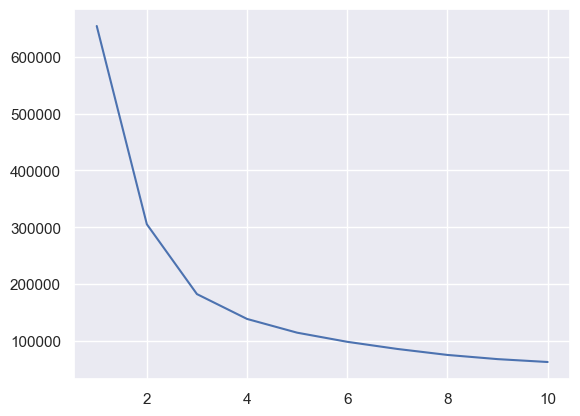

In [80]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(bowler_for_clustering)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

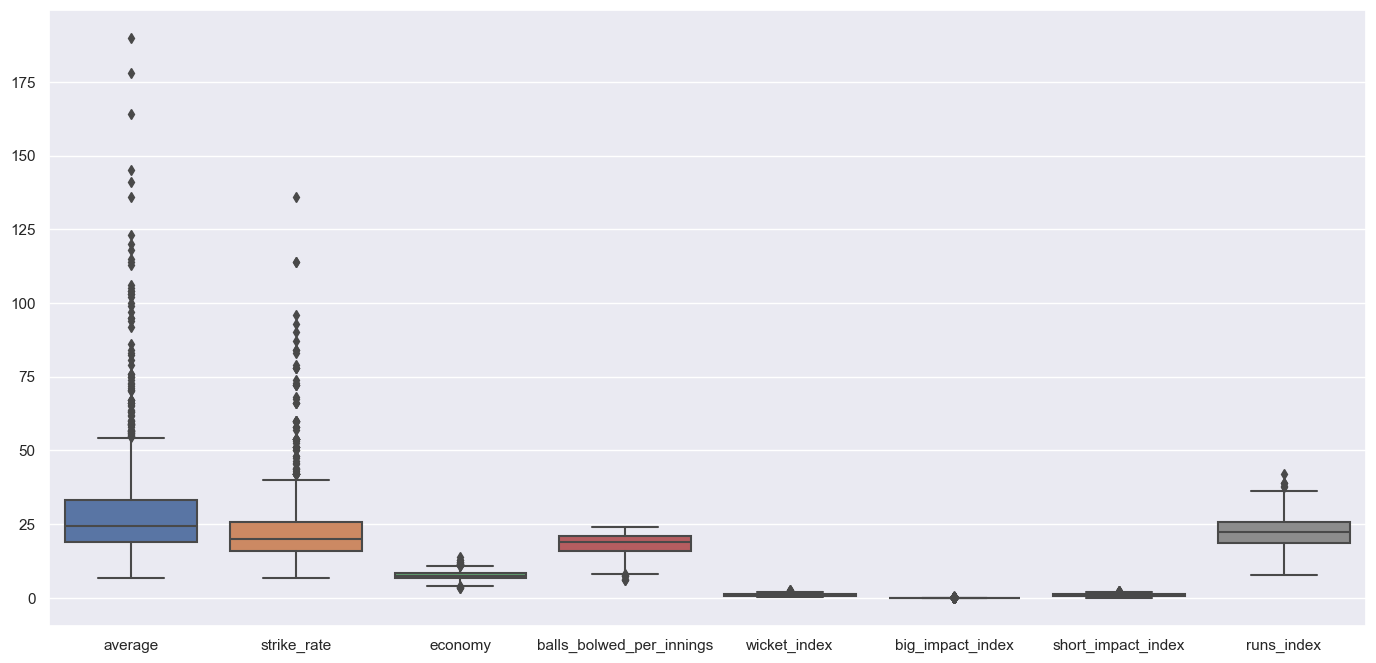

In [81]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=bowler_for_clustering)
plt.show()

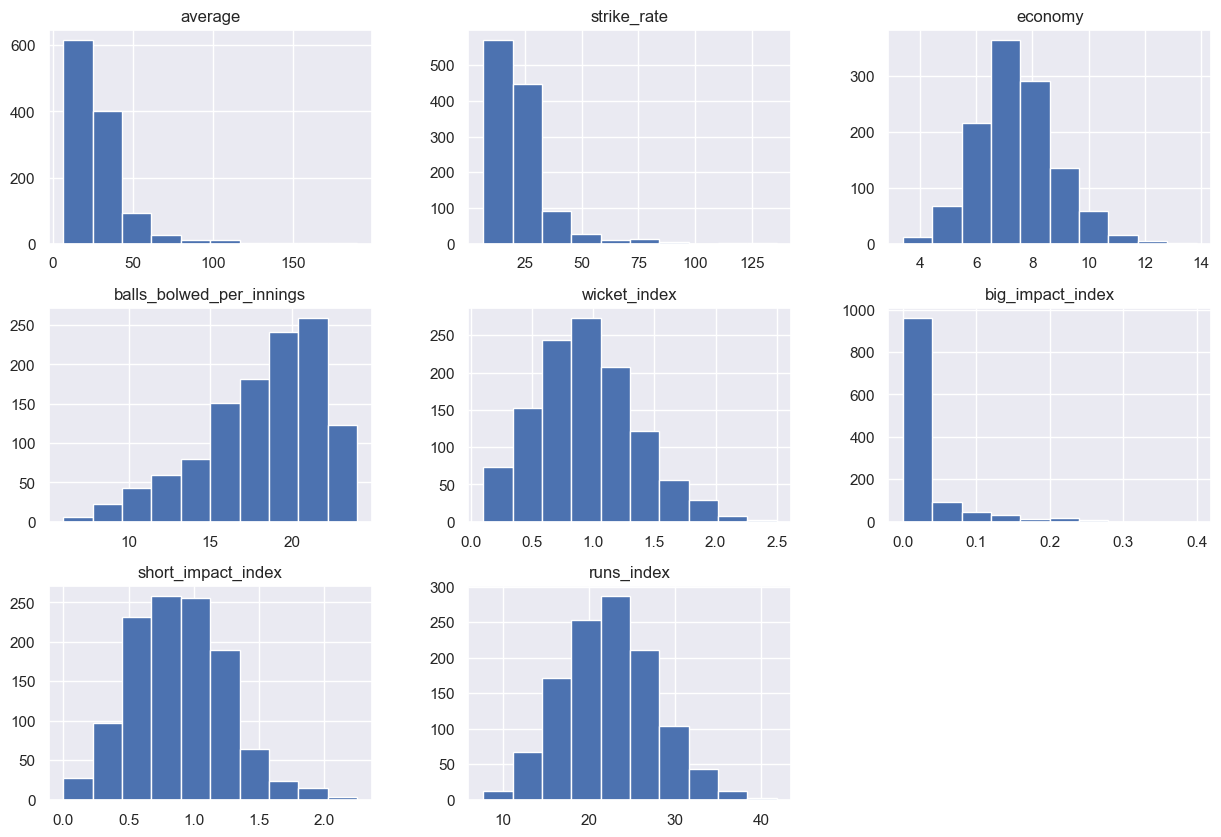

In [82]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
bowler_for_clustering.hist(ax=ax)
plt.show()

In [83]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(bowler_for_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(bowler_for_clustering, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.7078578291787428
For n_clusters = 3 The average silhouette_score is : 0.5127632727295736
For n_clusters = 4 The average silhouette_score is : 0.350246456954936
For n_clusters = 5 The average silhouette_score is : 0.33578033694563875
For n_clusters = 6 The average silhouette_score is : 0.2948209339697152
For n_clusters = 7 The average silhouette_score is : 0.28769616082952637
For n_clusters = 8 The average silhouette_score is : 0.2951882512792921
For n_clusters = 9 The average silhouette_score is : 0.2909373295927202
For n_clusters = 10 The average silhouette_score is : 0.2911527597527127


<Axes: >

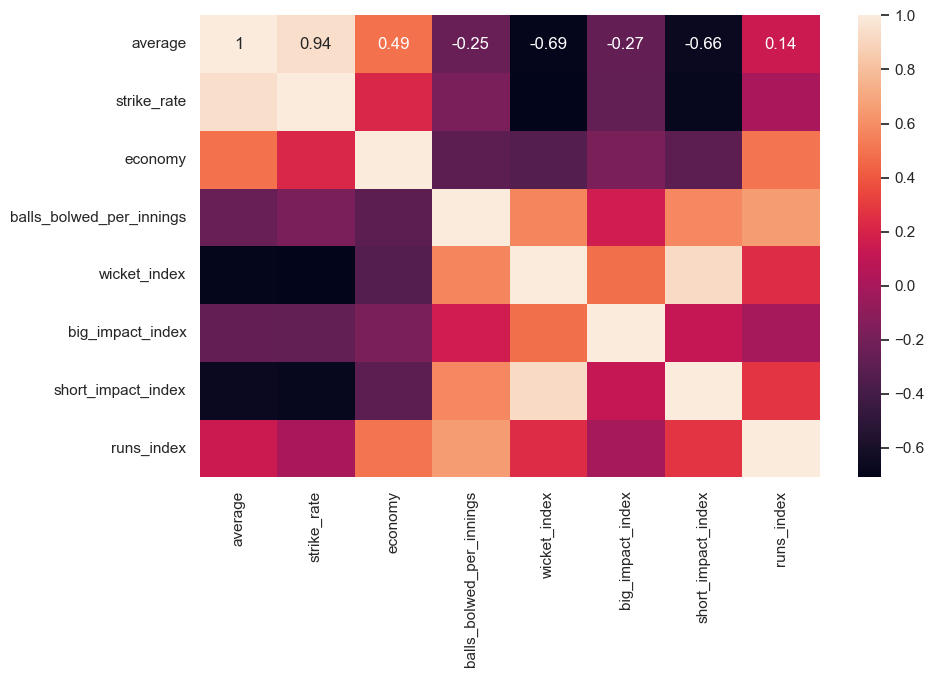

In [84]:
corr_normal = bowler_for_clustering.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_normal,annot=True)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bowler_std_Scaler= scaler.fit_transform(bowler_for_clustering)

bowler_std_Scaler = pd.DataFrame(bowler_std_Scaler,columns = columns)
bowler_std_Scaler

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,-0.487319,-0.405786,-0.559623,1.156136,0.735567,0.892335,0.463946,0.476379
1,-0.239167,-0.397811,0.527568,1.098851,0.686643,0.030704,0.745157,1.484949
2,-0.850572,-0.812500,-0.953014,1.255430,2.041828,1.627875,1.700726,0.167497
3,-0.439273,-0.485534,-0.023180,0.958093,0.823629,0.324919,0.753347,0.830505
4,-0.246559,-0.062869,-0.588233,1.146588,0.141145,0.219842,0.078989,0.438397
...,...,...,...,...,...,...,...,...
1162,1.947739,2.401345,0.012583,-1.469972,-1.717953,-0.431635,-1.736593,-1.088515
1163,1.736546,1.524117,0.999638,-2.083740,-1.717953,-0.431635,-1.736593,-1.274701
1164,1.155764,1.524117,-0.123316,-2.656590,-1.840262,-0.431635,-1.873103,-2.261488
1165,2.422924,2.959581,0.034041,-0.856204,-1.717953,-0.431635,-1.736593,-0.669596


In [86]:
bowler_std_Scaler.describe()

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
count,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03
mean,2.435451e-17,1.461270e-16,-6.575717e-16,-1.217725e-15,-4.870901e-17,2.435451e-17,-4.383811e-16,2.070133e-16
std,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00
min,-1.191121e+00,-1.298963e+00,-2.898513e+00,-3.311276e+00,-2.084880e+00,-4.316352e-01,-2.419143e+00,-2.717644e+00
25%,-5.459255e-01,-5.573068e-01,-6.704875e-01,-6.447955e-01,-6.978953e-01,-4.316352e-01,-7.400708e-01,-7.043200e-01
50%,-2.576467e-01,-2.462895e-01,-8.755309e-02,2.139339e-01,-5.699581e-02,-4.316352e-01,-6.025151e-02,-1.794486e-02
75%,2.053945e-01,2.202364e-01,5.669071e-01,7.805097e-01,6.059193e-01,-4.316352e-01,6.523301e-01,6.426435e-01
max,8.494729e+00,9.020430e+00,4.561617e+00,1.598867e+00,3.785955e+00,7.974527e+00,3.723803e+00,3.621994e+00


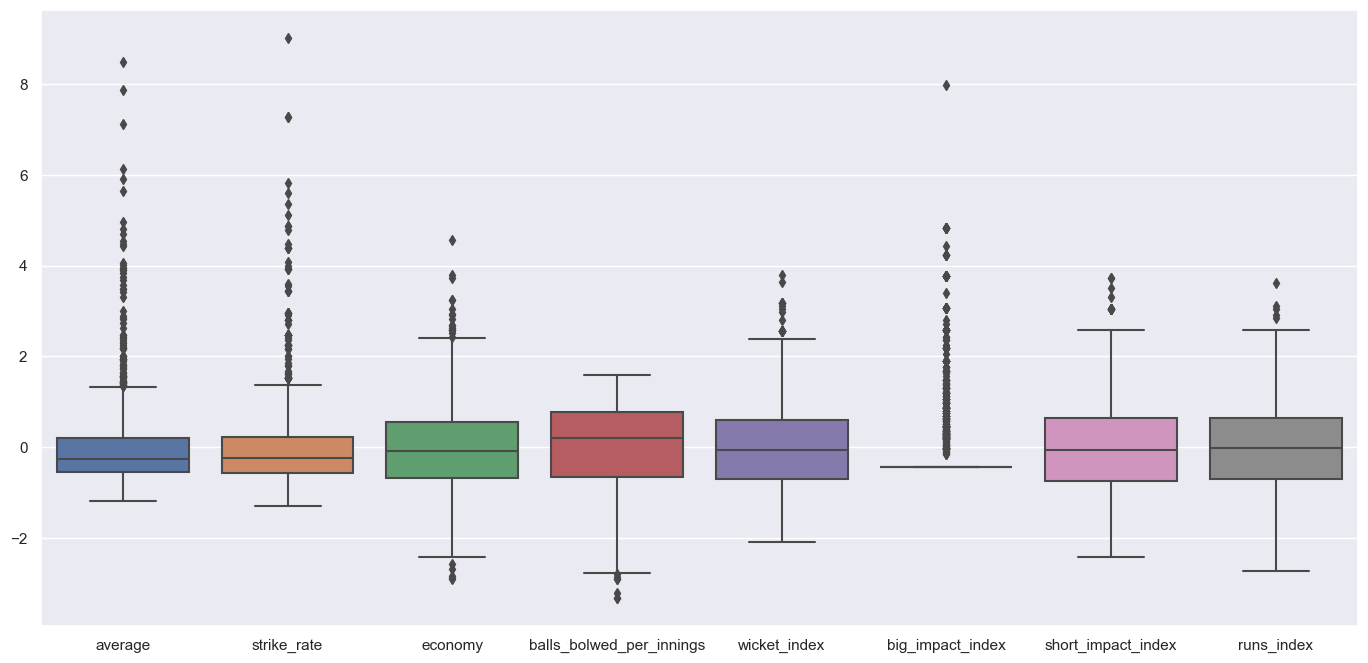

In [87]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=bowler_std_Scaler)
plt.show()

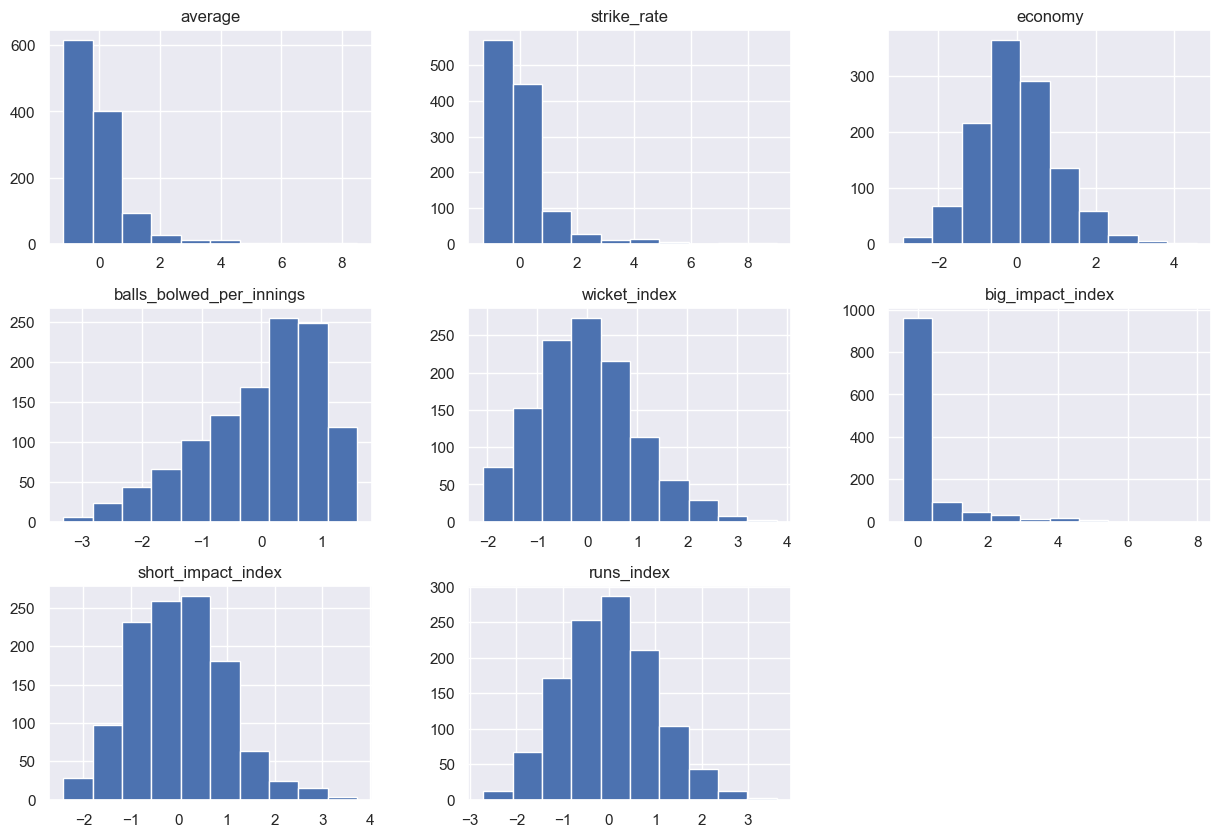

In [88]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
bowler_std_Scaler.hist(ax=ax)
plt.show()

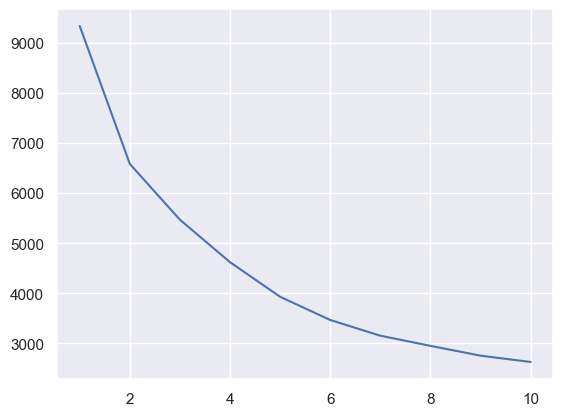

In [89]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(bowler_std_Scaler)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [90]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(bowler_std_Scaler)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(bowler_std_Scaler, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.28803888070572486
For n_clusters = 3 The average silhouette_score is : 0.2610327366262852
For n_clusters = 4 The average silhouette_score is : 0.22752352679456558
For n_clusters = 5 The average silhouette_score is : 0.24474033772837758
For n_clusters = 6 The average silhouette_score is : 0.23259522306026303
For n_clusters = 7 The average silhouette_score is : 0.23183379819898414
For n_clusters = 8 The average silhouette_score is : 0.22828644611489737
For n_clusters = 9 The average silhouette_score is : 0.2153056940900158
For n_clusters = 10 The average silhouette_score is : 0.22669763550608413


<Axes: >

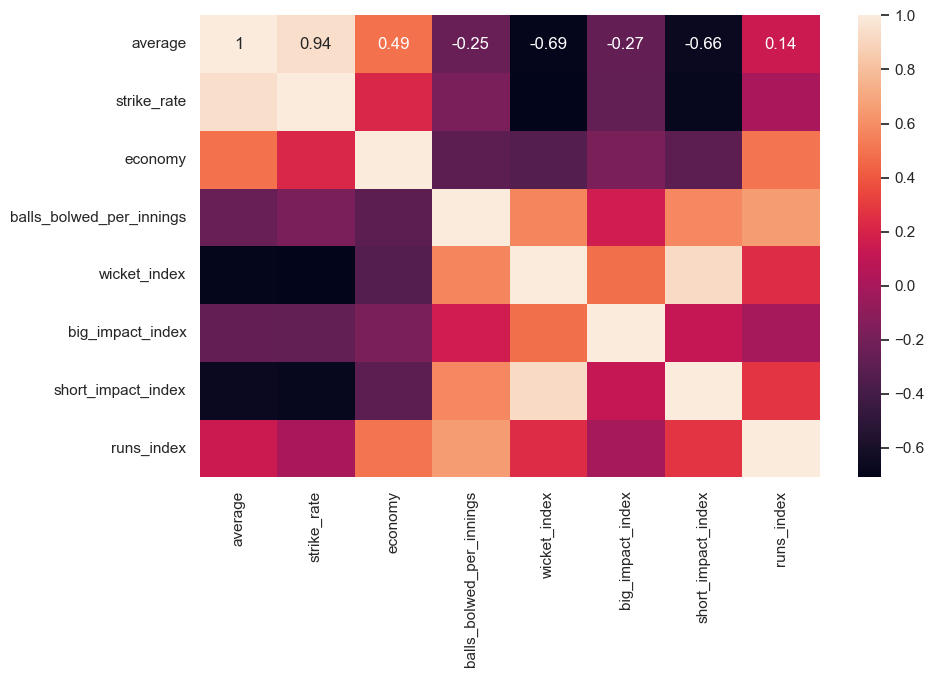

In [91]:
corr_std_scaler = bowler_std_Scaler.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_std_scaler,annot=True)